# Loading Squid Ink VWAP with Backtester - Round 2

This notebook focuses on loading Squid Ink data using the backtester package and calculating VWAP.

In [1]:
# Import necessary libraries
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configure plots to be larger and more readable
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Try to import seaborn for better styling
try:
    import seaborn as sns
    sns.set(style="whitegrid")
    print("Using Seaborn for plot styling")
except ImportError:
    print("Seaborn not available, using matplotlib default styling")

Using Seaborn for plot styling


## 1. Import Backtester Package

First, let's import the backtester package. We'll try multiple import paths to ensure we can find it.

In [2]:
# Add paths to search for the backtester package
# Try multiple paths to find the backtester package
possible_paths = [
    os.path.abspath('../../Testing'),  # Testing/backtester
    os.path.abspath('../..'),          # Root backtester
    os.path.abspath('../../..')        # Parent of root
]

for path in possible_paths:
    if path not in sys.path:
        sys.path.append(path)
        print(f"Added {path} to sys.path")

# Print all paths in sys.path for debugging
print("\nAll paths in sys.path:")
for i, path in enumerate(sys.path):
    print(f"{i}: {path}")

Added c:\Users\fujos\Github\Prosperity-3\Testing\Testing to sys.path
Added c:\Users\fujos\Github\Prosperity-3\Testing to sys.path
Added c:\Users\fujos\Github\Prosperity-3 to sys.path

All paths in sys.path:
0: c:\Users\fujos\anaconda3\envs\prosperity\python311.zip
1: c:\Users\fujos\anaconda3\envs\prosperity\DLLs
2: c:\Users\fujos\anaconda3\envs\prosperity\Lib
3: c:\Users\fujos\anaconda3\envs\prosperity
4: 
5: c:\Users\fujos\anaconda3\envs\prosperity\Lib\site-packages
6: c:\Users\fujos\anaconda3\envs\prosperity\Lib\site-packages\win32
7: c:\Users\fujos\anaconda3\envs\prosperity\Lib\site-packages\win32\lib
8: c:\Users\fujos\anaconda3\envs\prosperity\Lib\site-packages\Pythonwin
9: c:\Users\fujos\Github\Prosperity-3\Testing\Testing
10: c:\Users\fujos\Github\Prosperity-3\Testing
11: c:\Users\fujos\Github\Prosperity-3


In [3]:
# Try to import from Testing/backtester
try:
    from backtester import get_price_data
    print("Successfully imported backtester.get_price_data")
except ImportError as e:
    print(f"Error importing backtester: {e}")
    
    # If import failed, try to find the backtester module
    print("\nSearching for backtester module...")
    for path in possible_paths:
        backtester_path = os.path.join(path, 'backtester')
        if os.path.exists(backtester_path):
            print(f"Found backtester at {backtester_path}")
            if os.path.exists(os.path.join(backtester_path, '__init__.py')):
                print(f"  - Has __init__.py")
            else:
                print(f"  - Missing __init__.py")
                
            # List files in the directory
            files = os.listdir(backtester_path)
            print(f"  - Files: {files}")
        else:
            print(f"No backtester at {backtester_path}")

Successfully imported backtester.get_price_data


## 2. Load Squid Ink Data

Now, let's load the Squid Ink price data for Round 2 using the backtester package if available, or fall back to alternative methods.

In [4]:
# Try to load data using backtester
try:
    # Check if get_price_data is available
    if 'get_price_data' in globals():
        print("Using backtester.get_price_data to load data")
        prices = get_price_data('SQUID_INK', 2)
        print(f"Successfully loaded price data with {len(prices)} rows")
    else:
        raise ImportError("get_price_data not available")
        
except (ImportError, NameError) as e:
    print(f"Could not use backtester: {e}")
    print("Trying alternative method...")
    
    # Try to import from util_minimal in data_utils
    try:
        sys.path.append(os.path.abspath('../../data_utils'))
        import util_minimal
        print("Successfully imported util_minimal")
        
        # Load data using util_minimal
        print("Loading price data using util_minimal...")
        all_prices = util_minimal.load_all_price_data(2)
        prices = all_prices[all_prices['product'] == 'SQUID_INK']
        print(f"Successfully loaded price data with {len(prices)} rows")
        
    except ImportError as e:
        print(f"Could not import util_minimal: {e}")
        print("Trying direct CSV loading...")
        
        # Define a function to load price data from CSV files
        def load_price_data(round_num):
            # Path to data directory - try multiple possible locations
            possible_data_paths = [
                '../../../Prosperity 3 Data',
                '../../../../Prosperity 3 Data',
                '../../../../../Prosperity 3 Data',
                'Prosperity 3 Data'
            ]
            
            # Find the first valid data path
            data_path = None
            for path in possible_data_paths:
                if os.path.exists(path):
                    data_path = path
                    print(f"Found data directory at {path}")
                    break
            
            if data_path is None:
                print("Could not find data directory")
                return pd.DataFrame()
            
            # List all CSV files for the round
            import glob
            file_pattern = os.path.join(data_path, f'Round {round_num}/prices_round_{round_num}_day_*.csv')
            files = glob.glob(file_pattern)
            
            if not files:
                print(f"No files found matching pattern: {file_pattern}")
                return pd.DataFrame()
            
            # Load and concatenate all files
            dfs = []
            for file in files:
                print(f"Loading {file}...")
                df = pd.read_csv(file, sep=';')
                dfs.append(df)
            
            # Concatenate all dataframes
            all_data = pd.concat(dfs, ignore_index=True)
            
            # Filter for SQUID_INK
            squid_data = all_data[all_data['product'] == 'SQUID_INK']
            print(f"Successfully loaded price data with {len(squid_data)} rows")
            
            return squid_data
        
        # Load data using direct CSV loading
        print("Loading price data from CSV files...")
        prices = load_price_data(2)

Using backtester.get_price_data to load data
Loading real data for SQUID_INK from round 2...
Data for Round 2, Day -2 not found. Skipping.
Found data file at ../../../Prosperity 3 Data/Round 2/prices_round_2_day_-1.csv
Found data file at ../../../Prosperity 3 Data/Round 2/prices_round_2_day_0.csv
Found data file at ../../../Prosperity 3 Data/Round 2/prices_round_2_day_1.csv
Successfully loaded real data with 30000 rows
Successfully loaded price data with 30000 rows


## 3. Examine the Data

Let's take a look at the structure of the data.

In [5]:
# Display the first few rows of the data
print("First few rows of the data:")
prices.head()

First few rows of the data:


,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,vwap
timestamp,,,,,,,,,,,,,,,,,
0,-1,SQUID_INK,2005,1,2002.0,31.0,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2005.5,0.0,2004.015873
100,-1,SQUID_INK,2004,24,NaN,NaN,NaN,NaN,2007,24,NaN,NaN,NaN,NaN,2005.5,0.0,2005.500000
200,-1,SQUID_INK,2003,22,NaN,NaN,NaN,NaN,2006,20,NaN,NaN,NaN,NaN,2004.5,0.0,2004.428571
300,-1,SQUID_INK,2003,31,NaN,NaN,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2004.5,0.0,2004.500000
400,-1,SQUID_INK,2004,27,NaN,NaN,NaN,NaN,2007,27,NaN,NaN,NaN,NaN,2005.5,0.0,2005.500000


In [6]:
# Check the columns in the dataframe
print("Columns in the dataframe:")
prices.columns

Columns in the dataframe:


Index(['day', 'product', 'bid_price_1', 'bid_volume_1', 'bid_price_2',
       'bid_volume_2', 'bid_price_3', 'bid_volume_3', 'ask_price_1',
       'ask_volume_1', 'ask_price_2', 'ask_volume_2', 'ask_price_3',
       'ask_volume_3', 'mid_price', 'profit_and_loss', 'vwap'],
      dtype='object')

## 4. Calculate VWAP

Now, let's calculate the Volume-Weighted Average Price (VWAP) for Squid Ink if it's not already in the data.

In [7]:
# Check if VWAP is already in the dataframe
if 'vwap' in prices.columns:
    print("VWAP is already in the dataframe")
    squid_vwap = prices['vwap']
else:
    print("Calculating VWAP...")
    
    # Try to use backtester.get_vwap if available
    try:
        from backtester import get_vwap
        print("Using backtester.get_vwap")
        
        # Get all price data if we only have SQUID_INK data
        if 'product' not in prices.columns or len(prices['product'].unique()) == 1:
            print("Need to load all price data for VWAP calculation")
            # This is a placeholder - you would need to load all price data here
            # For now, we'll calculate VWAP manually
            raise ImportError("Need all price data for backtester.get_vwap")
        else:
            squid_vwap = get_vwap(prices, 'SQUID_INK')
            
    except (ImportError, NameError) as e:
        print(f"Could not use backtester.get_vwap: {e}")
        print("Calculating VWAP manually")
        
        # Make a copy of the dataframe to avoid modifying the original
        prices_copy = prices.copy()
        
        # Set timestamp as index if available
        if 'timestamp' in prices_copy.columns and prices_copy.index.name != 'timestamp':
            prices_copy.set_index('timestamp', inplace=True)
        
        # Calculate VWAP
        order_vol = prices_copy.filter(['ask_volume_1', 'ask_volume_2', 'ask_volume_3',
                                      'bid_volume_1', 'bid_volume_2', 'bid_volume_3'])
        order_vol = order_vol.fillna(0)  # Replace NaN with 0
        total_vol = order_vol.sum(axis=1)
        
        for i in range(1, 4):
            prices_copy.loc[:, f'ask_dolvol_{i}'] = prices_copy[f'ask_price_{i}'].multiply(order_vol[f'ask_volume_{i}'], fill_value=0)
            prices_copy.loc[:, f'bid_dolvol_{i}'] = prices_copy[f'bid_price_{i}'].multiply(order_vol[f'bid_volume_{i}'], fill_value=0)
        
        dolvol = prices_copy.filter([
            'ask_dolvol_1', 'ask_dolvol_2', 'ask_dolvol_3',
            'bid_dolvol_1', 'bid_dolvol_2', 'bid_dolvol_3'
        ]).sum(axis=1)
        
        squid_vwap = dolvol.divide(total_vol)
        
        # Handle any NaN values (e.g., when total_vol is 0)
        squid_vwap = squid_vwap.fillna(method='ffill').fillna(method='bfill')

# Display basic statistics about the VWAP
print(f"\nVWAP statistics:")
print(f"Number of data points: {len(squid_vwap)}")
print(f"Min: {squid_vwap.min()}")
print(f"Max: {squid_vwap.max()}")
print(f"Mean: {squid_vwap.mean()}")
print(f"Median: {squid_vwap.median()}")

VWAP is already in the dataframe

VWAP statistics:
Number of data points: 30000
Min: 1734.5
Max: 2045.909090909091
Mean: 1922.2558874214142
Median: 1921.5274177467597


## 5. Visualize VWAP

Let's visualize the VWAP over time.

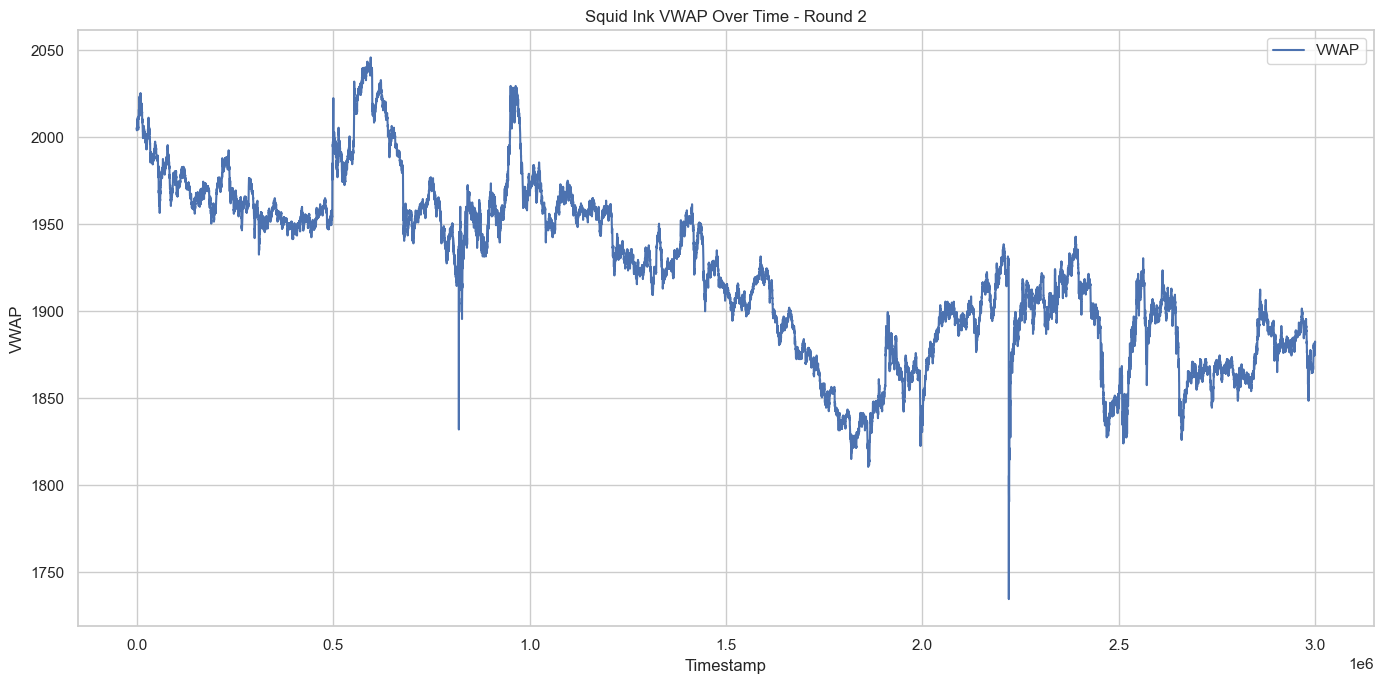

In [8]:
# Plot VWAP over time
plt.figure(figsize=(14, 7))
plt.plot(squid_vwap.index, squid_vwap.values, label='VWAP')
plt.title('Squid Ink VWAP Over Time - Round 2')
plt.xlabel('Timestamp')
plt.ylabel('VWAP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

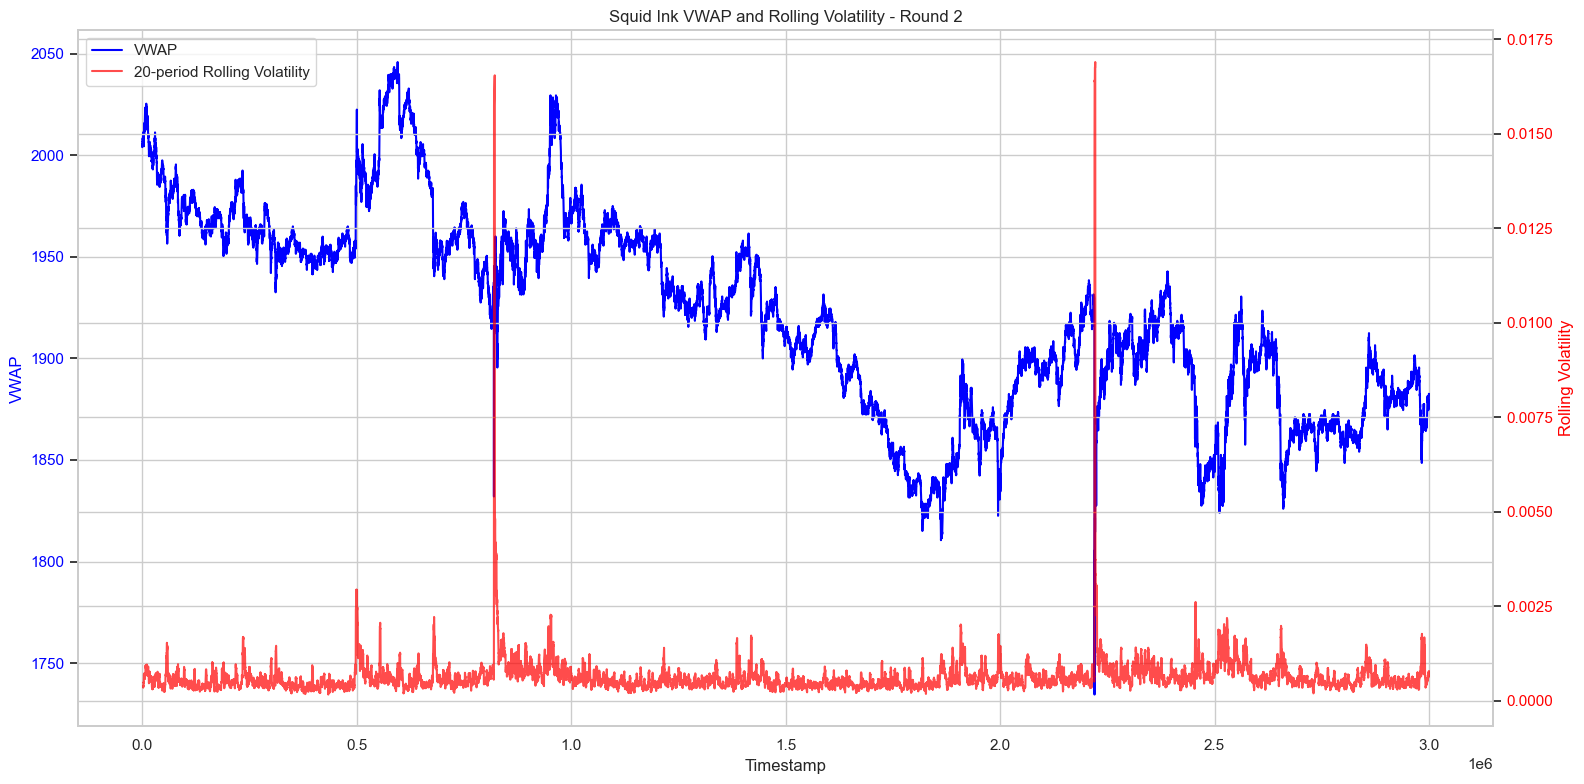

In [15]:
# Calculate log returns and rolling volatility
log_returns = np.log(squid_vwap).diff().dropna()
vol_window = 20  # Adjust this window size as needed
rolling_vol = log_returns.rolling(window=vol_window).std()  # Annualized

# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(16, 8))

# Plot VWAP on primary y-axis
ax1.plot(squid_vwap.index, squid_vwap.values, label='VWAP', color='blue')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('VWAP', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary y-axis for volatility
ax2 = ax1.twinx()
ax2.plot(rolling_vol.index, rolling_vol.values, label=f'{vol_window}-period Rolling Volatility', 
         color='red', alpha=0.7)
ax2.set_ylabel('Rolling Volatility', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Squid Ink VWAP and Rolling Volatility - Round 2')
plt.grid(True)
plt.tight_layout()
plt.show()

## 6. Save VWAP Data

Let's save the VWAP data for future use.

In [9]:
# Create a DataFrame with the VWAP data
vwap_df = pd.DataFrame(squid_vwap)
vwap_df.columns = ['vwap']

# Save to CSV
output_dir = '../data'
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, 'squid_vwap_round2.csv')
vwap_df.to_csv(output_file)
print(f"VWAP data saved to {output_file}")

VWAP data saved to ../data\squid_vwap_round2.csv


## 7. Summary

In this notebook, we have:
1. Imported the backtester package (or attempted to)
2. Loaded Squid Ink price data for Round 2
3. Calculated the Volume-Weighted Average Price (VWAP)
4. Visualized the VWAP over time
5. Saved the VWAP data for future use

This data can now be used for further analysis and trading strategy development.